# Attendance analyse from MS Teams calls

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [9]:
df = pd.read_csv('data/meetingAttendanceReport(Ignitions)2022-06-07.csv', header=7, sep='\t', 
                engine='python', encoding='utf-16')

In [10]:
df.head()

,Nome Completo,Horário de Entrada,Horário de Saída,Duração,Email,Função,ID do participante (UPN)
0,Soraya Quaresma Santos,07/06/2022 11:00,07/06/2022 11:41,41m 23s,soraya.quaresma@dtidigital.com.br,Apresentador,soraya.quaresma@dtidigital.com.br
1,Letícia Alves Vial,07/06/2022 11:00,07/06/2022 11:11,11m 24s,leticia.vial@dtidigital.com.br,Apresentador,leticia.vial@dtidigital.com.br
2,Priscila Polastri Albuquerque,07/06/2022 11:00,07/06/2022 11:20,20m 4s,priscila.albuquerque@dtidigital.com.br,Apresentador,priscila.albuquerque@dtidigital.com.br
3,Rafaella Jéssica Calmon Chaves,07/06/2022 11:00,07/06/2022 11:55,55m 23s,rafaella.andrade@dtidigital.com.br,Apresentador,rafaella.andrade@dtidigital.com.br
4,Marcos Antônio Messias,07/06/2022 11:00,07/06/2022 11:00,18s,marcos.messias@dtidigital.com.br,Apresentador,marcos.messias@dtidigital.com.br


In [11]:
df.columns = [re.sub(' ','_',col) for col in df.columns]

In [12]:
df.dtypes

Nome_Completo               object
Horário_de_Entrada          object
Horário_de_Saída            object
Duração                     object
Email                       object
Função                      object
ID_do_participante_(UPN)    object
dtype: object

In [13]:
df['Duração'] = df['Duração'].apply(lambda t: pd.to_timedelta(t).total_seconds()/60.0)

In [14]:
df.columns

Index(['Nome_Completo', 'Horário_de_Entrada', 'Horário_de_Saída', 'Duração',
       'Email', 'Função', 'ID_do_participante_(UPN)'],
      dtype='object')

In [15]:
df_agg = df.groupby('Nome_Completo').agg({'Horário_de_Entrada':'min',
                                          'Horário_de_Saída':'max',
                                          'Duração':'sum',
                                          'Email':'max', 
                                          'Função':'max', 
                                          'ID_do_participante_(UPN)':'max'
                                            })

In [16]:
df_agg.head()

,Horário_de_Entrada,Horário_de_Saída,Duração,Email,Função,ID_do_participante_(UPN)
Nome_Completo,,,,,,
Ariel Thamara Alberto Alves,07/06/2022 11:10,07/06/2022 11:39,29.733333,ariel.thamara@dtidigital.com.br,Apresentador,ariel.thamara@dtidigital.com.br
Bruno Feliciano,07/06/2022 11:08,07/06/2022 11:38,30.216667,bruno.feliciano@dtidigital.com.br,Apresentador,bruno.feliciano@dtidigital.com.br
Cleverson Montanario,07/06/2022 11:06,07/06/2022 11:46,17.050000,cleverson.montanario@dtidigital.com.br,Apresentador,cleverson.montanario@dtidigital.com.br
Cézar Willian Ferreira,07/06/2022 11:05,07/06/2022 11:08,3.200000,cezar.ferreira@dtidigital.com.br,Apresentador,cezar.ferreira@dtidigital.com.br
Daniel Fernandes Pinho,07/06/2022 11:01,07/06/2022 11:46,44.683333,daniel.pinho@dtidigital.com.br,Apresentador,daniel.pinho@dtidigital.com.br


In [17]:
sum(df_agg["Horário_de_Saída"]<'07/06/2022 11:15')

5

presentes: 40
Permanência média: 31 min
% menos que 5 min: 17.5%
% entre 5 e 30 min: 25.0%
% mais que 30 min: 57.5%
permaneceram depois do fim da apresentação (40 min): 40.0%


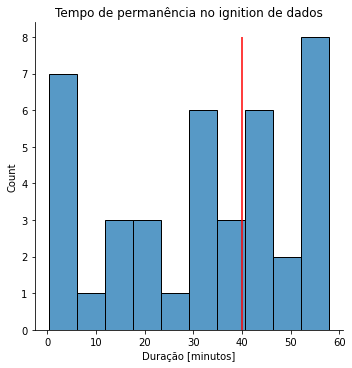

In [18]:
sns.displot(df_agg['Duração'], bins=10)
plt.vlines(x=40, ymin=0, ymax=8, color='r')
plt.tight_layout()
sns.despine()
# sns.set_style("dark")
plt.title('Tempo de permanência no ignition de dados')
plt.xlabel('Duração [minutos]')

print(f'Presentes: {df_agg.shape[0]}')
print(f'Permanência média: {round(np.mean(df_agg["Duração"]))} min')
print(f'% menos que 5 min: {round(sum(df_agg["Duração"]<5)/df_agg.shape[0]*100,1)}%')
print(f'% entre 5 e 30 min: {round(sum((df_agg["Duração"]>=5)&(df_agg["Duração"]<30))/df_agg.shape[0]*100,2)}%')
print(f'% mais que 30 min: {round(sum(df_agg["Duração"]>=30)/df_agg.shape[0]*100,1)}%')
print(f'permaneceram depois do fim da apresentação (40 min): {round(sum(df_agg["Duração"]>=40)/df_agg.shape[0]*100,1)}%')